## Evaluación de Modelos

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

In [2]:
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


Dataset Shape: (1797, 64)

Number of Classes: 10

Feature Names: Each feature represents pixel intensity values

Samples per digit:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


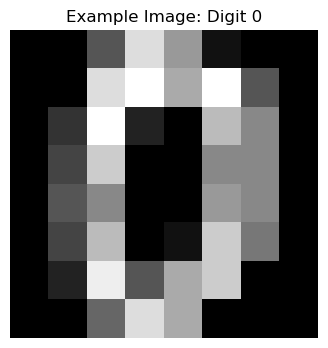

In [3]:
# Load the digits dataset
digits = load_digits()

# Basic dataset information
print("Dataset Shape:", digits.data.shape)
print("\nNumber of Classes:", len(digits.target_names))
print("\nFeature Names: Each feature represents pixel intensity values")

# Convert to DataFrame for easier analysis
digits_df = pd.DataFrame(digits.data)
digits_df['target'] = digits.target

# Count samples per class
print("\nSamples per digit:")
print(digits_df['target'].value_counts().sort_index())

# Visualize one example
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Example Image: Digit {digits.target[0]}")
plt.axis('off')
plt.show()

In [4]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=42)

val_scores = []
neighbors = np.arange(1, 15, 1)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))

print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.991
best n_neighbors: 1
test-set score: 0.982


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Split data into train+validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=42)
# Split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=42)

# Create lists to store validation scores
val_scores = []
# Test different depths from 1 to 15
depths = np.arange(1, 15, 1)

# Try each depth and record validation scores
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    val_scores.append(tree.score(X_val, y_val))

# Find and print the best validation score and corresponding depth
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_depth = depths[np.argmax(val_scores)]
print("best max_depth:", best_depth)

# Train final model with best depth on combined training and validation data
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(tree.score(X_test, y_test)))

best validation score: 0.843
best max_depth: 10
test-set score: 0.867


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Split data into train+validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=42)
# Split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=42)

# Define parameter ranges
depths = np.arange(1, 15, 1)
min_samples = np.logspace(0, 3, 10).astype(int)  # Creates array from 1 to 1000

# Create variables to store best parameters and scores
best_score = 0
best_depth = None
best_min_samples = None
val_scores = []

# Nested loops to try all combinations
for depth in depths:
    for min_leaf in min_samples:
        tree = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_leaf=min_leaf,
            random_state=42
        )
        tree.fit(X_train, y_train)
        score = tree.score(X_val, y_val)
        val_scores.append({
            'max_depth': depth,
            'min_samples_leaf': min_leaf,
            'score': score
        })
        
        # Update best parameters if we find a better score
        if score > best_score:
            best_score = score
            best_depth = depth
            best_min_samples = min_leaf

# Print best parameters and score
print("Best validation score: {:.3f}".format(best_score))
print("Best parameters:")
print("max_depth:", best_depth)
print("min_samples_leaf:", best_min_samples)

# Train final model with best parameters on combined training and validation data
tree = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=42
)
tree.fit(X_trainval, y_trainval)
print("Test-set score: {:.3f}".format(tree.score(X_test, y_test)))

Best validation score: 0.843
Best parameters:
max_depth: 10
min_samples_leaf: 1
Test-set score: 0.867


In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': depths,
    'min_samples_leaf': min_samples
}
# Verbose parameter only indicates the progress of the search, more verbose means more output
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, verbose=1)

grid_search.fit(X_trainval, y_trainval)
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Train final model with best parameters on combined training and validation data
tree = grid_search.best_estimator_
tree.fit(X_trainval, y_trainval)
print("Test-set score: {:.3f}".format(tree.score(X_test, y_test)))

# Is possible to get the score directly from the grid object
print("Test-set score (directly with grid object): {:.3f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best parameters from GridSearchCV:
{'max_depth': 11, 'min_samples_leaf': 1}
Best cross-validation score: 0.842
Test-set score: 0.871
Test-set score (directly with grid object): 0.871


In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': np.arange(1, 15, 1),
    'min_samples_leaf': np.logspace(0, 3, 10).astype(int)
}

# Create and fit GridSearchCV
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:")
print(f"max_depth: {grid_search.best_params_['max_depth']}")
print(f"min_samples_leaf: {grid_search.best_params_['min_samples_leaf']}")
print(f"\nBest cross-validation score: {grid_search.best_score_:.3f}")
print(f"Test set score: {grid_search.score(X_test, y_test):.3f}")

# Create DataFrame of all results
results = pd.DataFrame(grid_search.cv_results_)
# Sort by mean test score in descending order
top_results = results.sort_values('mean_test_score', ascending=False).head()

print("\nTop 5 parameter combinations:")
for idx, row in top_results.iterrows():
    print(f"\nRank {row['rank_test_score']}:")
    print(f"max_depth: {row['param_max_depth']}")
    print(f"min_samples_leaf: {row['param_min_samples_leaf']}")
    print(f"Mean CV Score: {row['mean_test_score']:.3f} (+/- {row['std_test_score']*2:.3f})")

Best parameters:
max_depth: 11
min_samples_leaf: 1

Best cross-validation score: 0.842
Test set score: 0.871

Top 5 parameter combinations:

Rank 1:
max_depth: 11
min_samples_leaf: 1
Mean CV Score: 0.842 (+/- 0.042)

Rank 2:
max_depth: 10
min_samples_leaf: 1
Mean CV Score: 0.841 (+/- 0.027)

Rank 3:
max_depth: 12
min_samples_leaf: 1
Mean CV Score: 0.840 (+/- 0.043)

Rank 4:
max_depth: 9
min_samples_leaf: 1
Mean CV Score: 0.839 (+/- 0.052)

Rank 5:
max_depth: 13
min_samples_leaf: 1
Mean CV Score: 0.838 (+/- 0.040)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters:", grid.best_params_)

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.987
best parameters: {'n_neighbors': 1}
test-set score: 0.982


In [12]:
import pandas as pd

results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [13]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

In [14]:
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001135      0.000282         0.002101        0.000376   
1       0.001000      0.000186         0.001927        0.000186   
2       0.000906      0.000092         0.002079        0.000379   
3       0.000905      0.000060         0.002251        0.000149   
4       0.000892      0.000070         0.002283        0.000110   
5       0.000955      0.000083         0.002458        0.000118   
6       0.000952      0.000125         0.002503        0.000120   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}           0.985185   
1                  3   {'n_neighbors': 3}           0.992593   
2                  5   {'n_neighbors': 5}           0.992593   
3                  7   {'n_neighbors': 7}           0.985185   
4                  9   {'n_neighbors': 9}           0.977778   
5                 11  {'n_neighbors': 11}           0.970370   
6              

### Clasificadores Base (Dummy Classifiers)

In [15]:
dataset = load_digits()
X, y = dataset.data, dataset.target

# Vemos la distribución de clases, apreciendo que es balanceada
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [16]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

# Con esta transformación, la clase negativa (0) es la más frecuente, ahora está desbalanceado el dataset
print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, stratify = y_binary_imbalanced, random_state=0)

In [18]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
dummy_majority.score(X_test, y_test)

0.8977777777777778

El mismo dataset con KNN obtenía también un score superior al 90%, esto es señal de que esta métrica no es la mejor posible.

### Matriz de Confusión

#### Binaria para 2 clases

In [20]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[404   0]
 [ 46   0]]


In [21]:
len(y_test)

450

In [22]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[370  34]
 [ 43   3]]


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[399   5]
 [  4  42]]


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[393  11]
 [ 20  26]]


### Evaluación de Métricas para Clasificación Binaria

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.93
Precision: 0.70
Recall: 0.57
F1: 0.63


In [26]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       404
           1       0.70      0.57      0.63        46

    accuracy                           0.93       450
   macro avg       0.83      0.77      0.79       450
weighted avg       0.93      0.93      0.93       450



In [27]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted,  target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.95      0.97      0.96       404
           1       0.70      0.57      0.63        46

    accuracy                           0.93       450
   macro avg       0.83      0.77      0.79       450
weighted avg       0.93      0.93      0.93       450



In [28]:
classification_report(y_test, tree_predicted,  target_names=['not 1', '1'], output_dict=True)

{'not 1': {'precision': 0.9515738498789347,
  'recall': 0.9727722772277227,
  'f1-score': 0.9620563035495716,
  'support': 404.0},
 '1': {'precision': 0.7027027027027027,
  'recall': 0.5652173913043478,
  'f1-score': 0.6265060240963856,
  'support': 46.0},
 'accuracy': 0.9311111111111111,
 'macro avg': {'precision': 0.8271382762908187,
  'recall': 0.7689948342660353,
  'f1-score': 0.7942811638229785,
  'support': 450.0},
 'weighted avg': {'precision': 0.9261336881675866,
  'recall': 0.9311111111111111,
  'f1-score': 0.9277556083165792,
  'support': 450.0}}

### Optimización de Parámetros Especificando Métrica

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, stratify = y_binary_imbalanced, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='precision')
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters:", grid.best_params_)

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.965
best parameters: {'n_neighbors': 5}
test-set score: 0.979


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, stratify = y_binary_imbalanced, random_state=0)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='recall')
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters:", grid.best_params_)

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 1.000
best parameters: {'n_neighbors': 1}
test-set score: 1.000
